In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
from glob import glob
import os
import time

import scipy.linalg
import scipy.stats

import kepler
import threebody
import quad_integrate

In [4]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 120

In [5]:
F = threebody.Fitter("0337+17-scott-2013-06-06",tzrmjd_middle=True)

In [6]:
bbats = np.linspace(1,600,600*1000)
orbit = threebody.compute_orbit_bbat([F.best_parameters[p] for p in F.parameters[:14]], bbats)

In [7]:
special_rhs = quad_integrate.KeplerRHS(special=True, general=False)
general_rhs = quad_integrate.KeplerRHS(special=False, general=True)

In [8]:
special_rhs.evaluate(orbit['states'][0],0)

array([-6.3060423, -2.0838513, -1.7033001,  18.737495, -16.758531,
       -13.693191,  0.0,  40.122912,  29.110287,  23.785052, -136.75014,
        121.91531,  99.615529,  0.0,  2.784152, -6.7134856, -5.4830741,
        0.16942747,  0.037207203,  0.030394923,  0.0,  3.1486999e-09], dtype=float128)

In [9]:
specials = np.array([special_rhs.evaluate(orbit['states'][i],0) for i in range(len(bbats))])

In [10]:
generals = np.array([general_rhs.evaluate(orbit['states'][i],0) for i in range(len(bbats))])

In [11]:
specials = specials[:,-1]
generals = generals[:,-1]


In [12]:
states = orbit['states']
rp1 = np.sqrt(np.sum((states[:,:3]-states[:,7:10])**2,axis=1))
rp2 = np.sqrt(np.sum((states[:,:3]-states[:,14:17])**2,axis=1))
inner_phase = (bbats-F.best_parameters['tasc_i'])/F.best_parameters['pb_i'] % 1
outer_phase = (bbats-F.best_parameters['tasc_o'])/F.best_parameters['pb_o'] % 1
cm_i = (states[:,6,None]*states[:,:3]+states[:,13,None]*states[:,7:10])/(states[:,6,None]+states[:,13,None])
rc2 = np.sqrt(np.sum((cm_i[:,:3]-states[:,14:17])**2,axis=1))

<matplotlib.colorbar.Colorbar instance at 0x3cc8878>

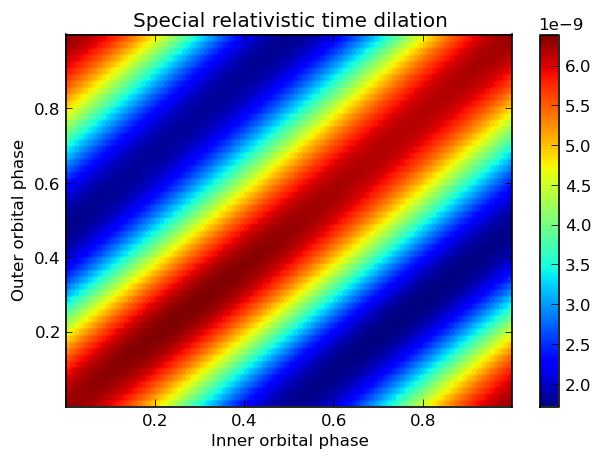

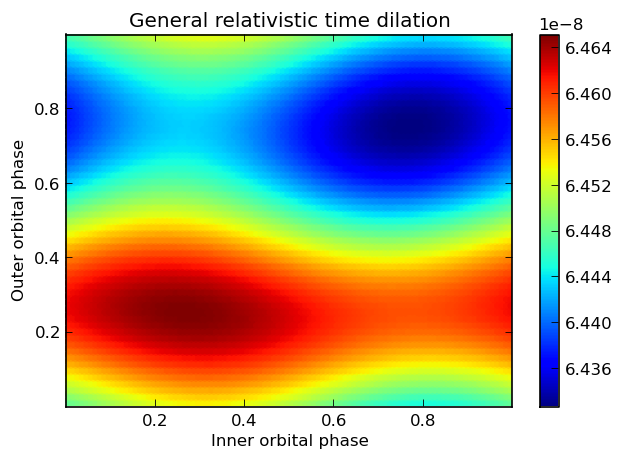

In [13]:
plt.hexbin(inner_phase, outer_phase, specials)
plt.title("Special relativistic time dilation")
plt.xlabel("Inner orbital phase")
plt.ylabel("Outer orbital phase")
plt.colorbar()
plt.figure()
plt.hexbin(inner_phase, outer_phase, generals)
plt.title("General relativistic time dilation")
plt.xlabel("Inner orbital phase")
plt.ylabel("Outer orbital phase")
plt.colorbar()


<matplotlib.colorbar.Colorbar instance at 0x5838b48>

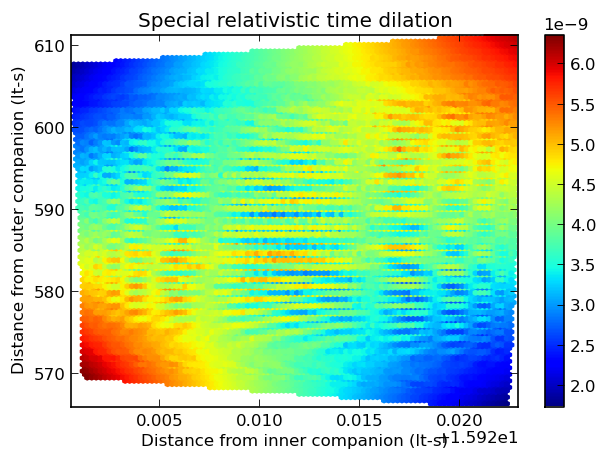

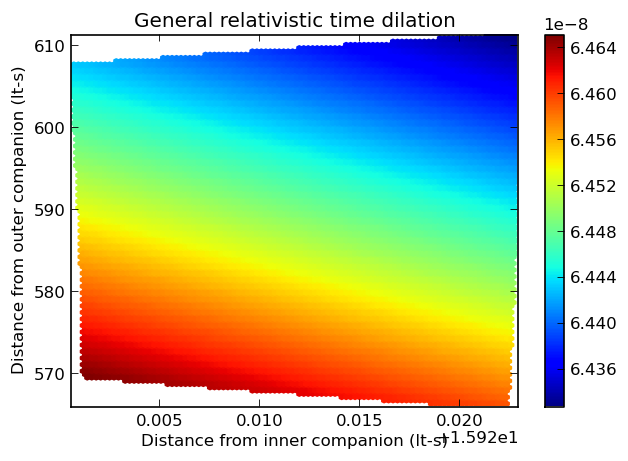

In [14]:
plt.hexbin(rp1, rp2, specials)
plt.title("Special relativistic time dilation")
plt.xlabel("Distance from inner companion (lt-s)")
plt.ylabel("Distance from outer companion (lt-s)")
plt.colorbar()
plt.figure()
plt.hexbin(rp1, rp2, generals)
plt.title("General relativistic time dilation")
plt.xlabel("Distance from inner companion (lt-s)")
plt.ylabel("Distance from outer companion (lt-s)")
plt.colorbar()


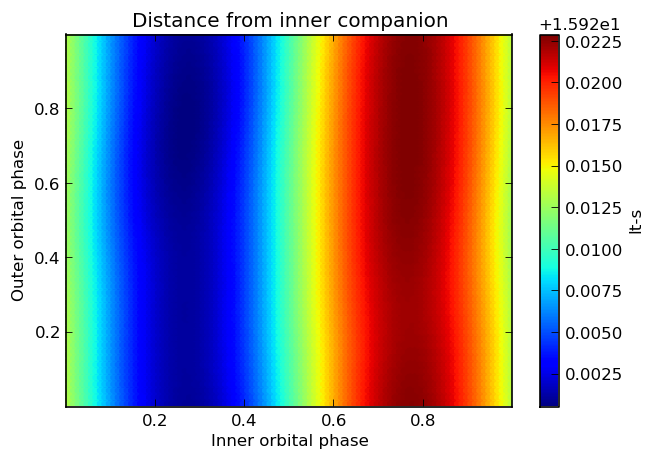

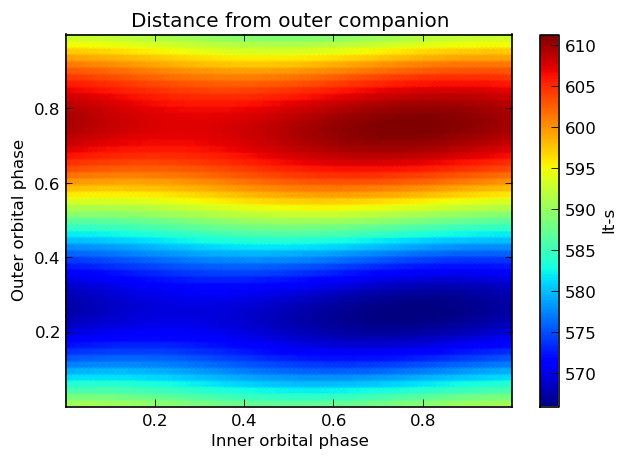

In [15]:
plt.hexbin(inner_phase, outer_phase, rp1)
plt.title("Distance from inner companion")
plt.xlabel("Inner orbital phase")
plt.ylabel("Outer orbital phase")
plt.colorbar().set_label("lt-s")
plt.figure()
plt.hexbin(inner_phase, outer_phase, rp2)
plt.title("Distance from outer companion")
plt.xlabel("Inner orbital phase")
plt.ylabel("Outer orbital phase")
plt.colorbar().set_label("lt-s")


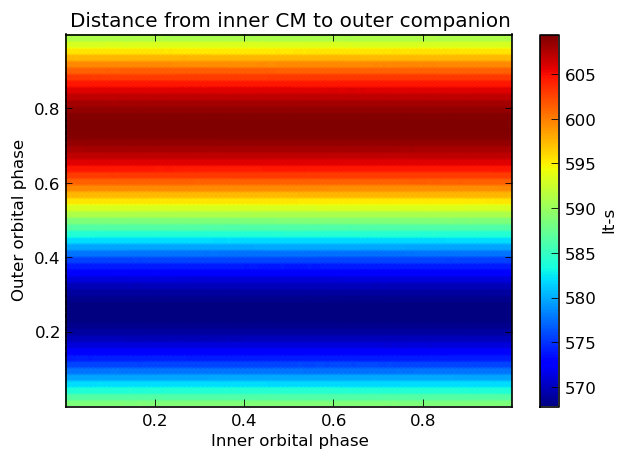

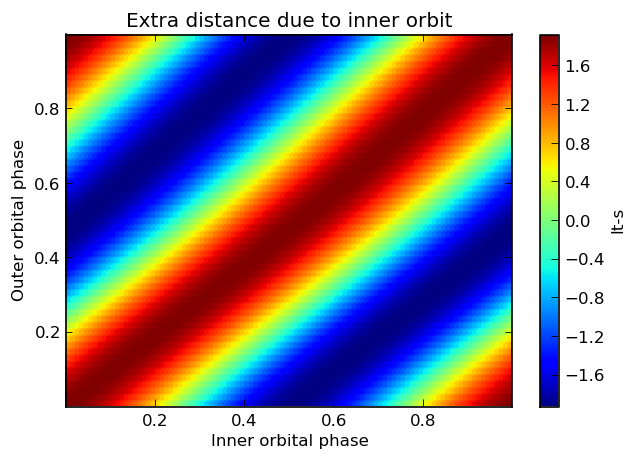

In [16]:
plt.hexbin(inner_phase, outer_phase, rc2)
plt.title("Distance from inner CM to outer companion")
plt.xlabel("Inner orbital phase")
plt.ylabel("Outer orbital phase")
plt.colorbar().set_label("lt-s")
plt.figure()
plt.hexbin(inner_phase, outer_phase, rp2-rc2)
plt.title("Extra distance due to inner orbit")
plt.xlabel("Inner orbital phase")
plt.ylabel("Outer orbital phase")
plt.colorbar().set_label("lt-s")
